## Customer Conversion Prediction

In [167]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = 'train.csv'

In [58]:
df = pd.read_csv(url)

## Data Cleaning

In [4]:
df.shape

(45211, 11)

In [59]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [6]:
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

In [7]:
df.describe()

,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


In [60]:
df.head(10)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
5,35,management,married,tertiary,unknown,5,may,139,1,unknown,no
6,28,management,single,tertiary,unknown,5,may,217,1,unknown,no
7,42,entrepreneur,divorced,tertiary,unknown,5,may,380,1,unknown,no
8,58,retired,married,primary,unknown,5,may,50,1,unknown,no
9,43,technician,single,secondary,unknown,5,may,55,1,unknown,no


In [9]:
columns = df.columns
columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

### Age

In [10]:
df.age.value_counts()

age
32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: count, Length: 77, dtype: int64

In [168]:
df.age.describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

### Job

In [11]:
df.job.value_counts()

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

### Marital Status

In [12]:
df.marital.value_counts()

marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64

### Educational Qualification

In [13]:
df.education_qual.value_counts()

education_qual
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

### Call Type

In [14]:
df.call_type.value_counts()

call_type
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64

### Day of the month

In [15]:
df.day.value_counts()

day
20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1842
28    1830
7     1817
19    1757
29    1745
15    1703
12    1603
13    1585
30    1566
9     1561
11    1479
4     1445
16    1415
2     1293
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: count, dtype: int64

### Month

In [16]:
df.mon.value_counts()

mon
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: count, dtype: int64

### Duration

In [17]:
df.dur.value_counts()

dur
124     188
90      184
89      177
104     175
122     175
       ... 
1833      1
1545      1
1352      1
1342      1
1556      1
Name: count, Length: 1573, dtype: int64

In [62]:
df.dur.describe() #potential outliers

count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: dur, dtype: float64

There are potential outliers in the data as the 75th Quantile shows value as 319 seconds but the maximum seconds a call goes on for is 4918. These outliers must be treated to get a better model.

### Outlier Detection and Correction using IQR Method

In [63]:
q3 = df.dur.quantile(0.75)
q1 = df.dur.quantile(0.25)
iqr = q3 - q1

upper_threshold = q3 + (1.5 * iqr)
lower_threshold = q1 - (1.5 * iqr)

q1, q3, iqr, upper_threshold, lower_threshold
df.dur = df.dur.clip(lower_threshold, upper_threshold)

In [64]:
df.dur.describe()

count    45211.000000
mean       234.939307
std        176.749932
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max        643.000000
Name: dur, dtype: float64

### Number of calls made

In [65]:
df.num_calls.value_counts()

num_calls
1     17544
2     12505
3      5521
4      3522
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
25       22
23       22
24       20
29       16
28       16
26       13
31       12
27       10
32        9
30        8
33        6
34        5
36        4
35        4
43        3
38        3
37        2
50        2
41        2
46        1
58        1
55        1
63        1
51        1
39        1
44        1
Name: count, dtype: int64

In [66]:
df.num_calls.describe()

count    45211.000000
mean         2.763841
std          3.098021
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: num_calls, dtype: float64

There are potential outliers in the data as the 75th Quantile shows value as 3 calls but the maximum calls made is given as 63. These outliers must be treated to get a better model.

### Outlier Detetction and Correction using IQR Method

In [67]:
q3 = df.num_calls.quantile(0.75)
q1 = df.num_calls.quantile(0.25)
iqr = q3 - q1

upper_threshold = q3 + (1.5 * iqr)
lower_threshold = q1 - (1.5 * iqr)

q1, q3, iqr, upper_threshold, lower_threshold

df.num_calls = df.num_calls.clip(lower_threshold, upper_threshold)

In [68]:
df.num_calls.describe()

count    45211.000000
mean         2.392228
std          1.600111
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: num_calls, dtype: float64

### Outcome from Previous call

In [69]:
df.prev_outcome.value_counts()

prev_outcome
unknown    36959
failure     4901
other       1840
success     1511
Name: count, dtype: int64

## EDA

In [26]:
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

In [80]:
df.y.value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

Target variable is classified into two outcomes: 'yes' or 'no'. These can be mapped to convert categorical data into numerical data.

In [82]:
df['target'] = df.y.copy()
df.target = df.target.map({'yes' : 1, 'no' : 0})

### Age

<Axes: xlabel='target', ylabel='age'>

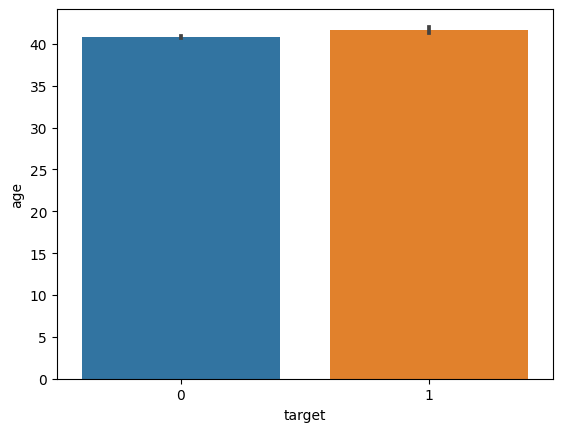

In [179]:
sns.barplot(x = 'target', y = 'age', data = df)

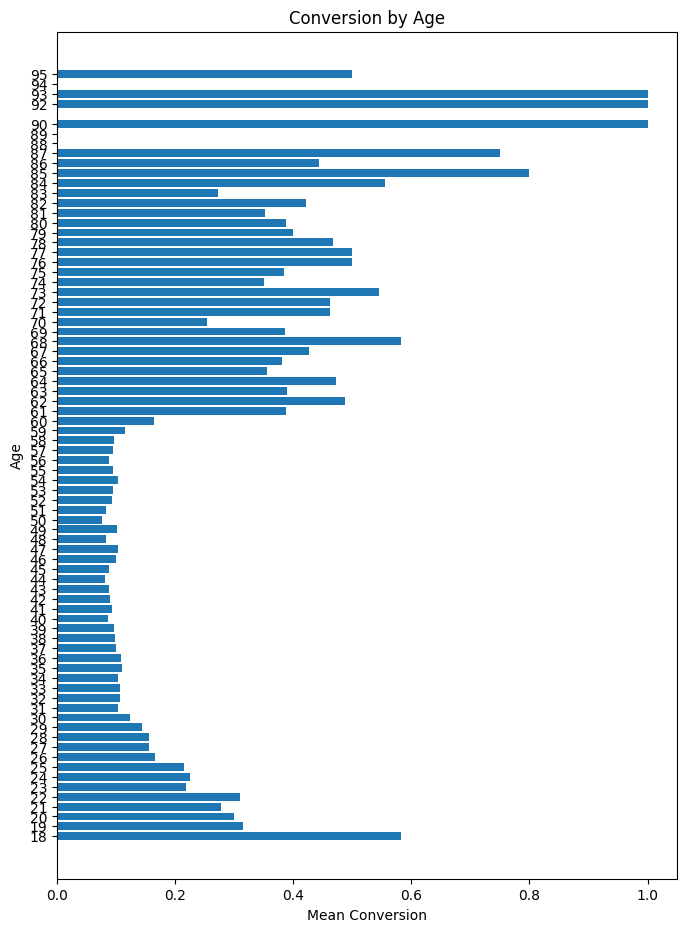

In [185]:
conversion_by_age = df.groupby('age')['target'].mean()
conversion_by_age_sorted = conversion_by_age.sort_values()

plt.figure(figsize = (8,11))
plt.barh(y=conversion_by_age_sorted.index , width=conversion_by_age_sorted.values)
plt.title('Conversion by Age')
plt.xlabel('Mean Conversion')
plt.ylabel('Age')
plt.yticks(conversion_by_age_sorted.index)
plt.show()

Conversion can be seen more in the age groups above 60 and below 20. The bar plot shows that there isn't significant difference in conversion based on age. Age does not seem to be an important factor in predicting conversion.

### Marital Status

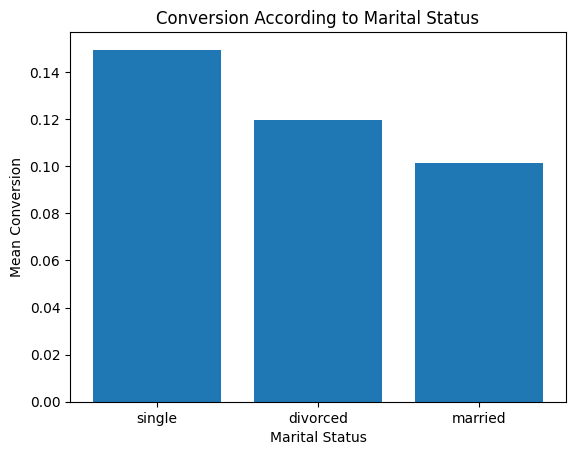

In [83]:
conversion_by_marital_status = df.groupby('marital')['target'].mean()
conversion_by_marital_status_sorted = conversion_by_marital_status.sort_values(ascending=False)

plt.bar(conversion_by_marital_status_sorted.index, conversion_by_marital_status_sorted.values)
plt.title('Conversion According to Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Mean Conversion')
plt.xticks(conversion_by_marital_status_sorted.index)  # This will ensure x-axis labels are displayed correctly
plt.show()


Maximum conversion by single people can be seen. Since there is a noteable difference, Marital Status can be considered as an important factor.

### Job

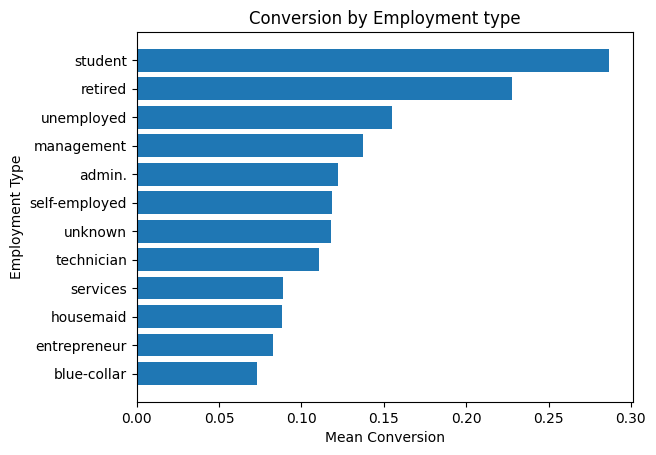

In [88]:
conversion_by_employment_type = df.groupby('job')['target'].mean()
conversion_by_employment_type_sorted = conversion_by_employment_type.sort_values()

plt.barh(y=conversion_by_employment_type_sorted.index , width=conversion_by_employment_type_sorted.values)
plt.title('Conversion by Employment type')
plt.xlabel('Mean Conversion')
plt.ylabel('Employment Type')
plt.yticks(conversion_by_employment_type_sorted.index)
plt.show()

Maximum conversion by students followed by retired people can be seen. Since there is a noteable difference, Employment type can be considered as an important factor.

### Educational Qualification

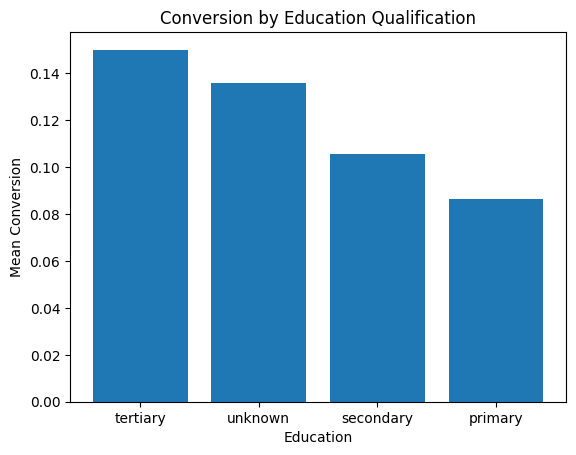

In [90]:
conversion_by_education = df.groupby('education_qual')['target'].mean()
conversion_by_education_sorted = conversion_by_education.sort_values(ascending = False)

plt.bar(conversion_by_education_sorted.index , conversion_by_education_sorted.values)
plt.title('Conversion by Education Qualification')
plt.xlabel('Education')
plt.ylabel('Mean Conversion')
plt.xticks(conversion_by_education_sorted.index)
plt.show()

Maximum conversion by people having tertiary education. 

### Call Type

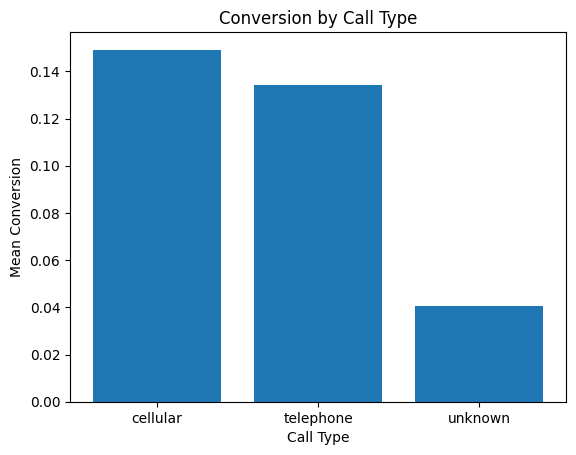

In [92]:
conversion_by_call_type = df.groupby('call_type')['target'].mean()
conversion_by_call_type_sorted = conversion_by_call_type.sort_values(ascending = False)

plt.bar(conversion_by_call_type_sorted.index , conversion_by_call_type_sorted.values)
plt.title('Conversion by Call Type')
plt.xlabel('Call Type')
plt.ylabel('Mean Conversion')
plt.xticks(conversion_by_call_type_sorted.index)
plt.show()

Maximum conversion through cellular calls can be seen. Since there is noteable difference, call type can be considered as an important factor.

### Day of the month

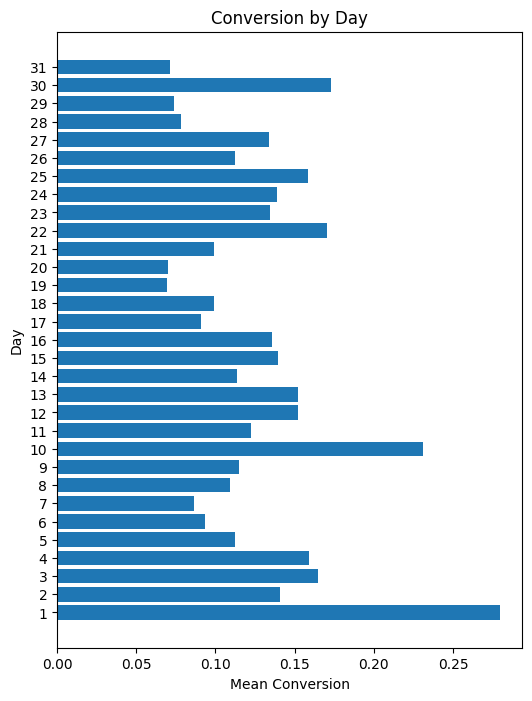

In [96]:
conversion_by_day = df.groupby('day')['target'].mean()

plt.figure(figsize=(6,8))
plt.barh(conversion_by_day.index , conversion_by_day.values)
plt.title('Conversion by Day')
plt.xlabel('Mean Conversion')
plt.ylabel('Day')
plt.yticks(conversion_by_day.index)
plt.show()

Maximum conversion around the 1st and last of every month. Day can be considered as an important factor influencing conversion.

### Month

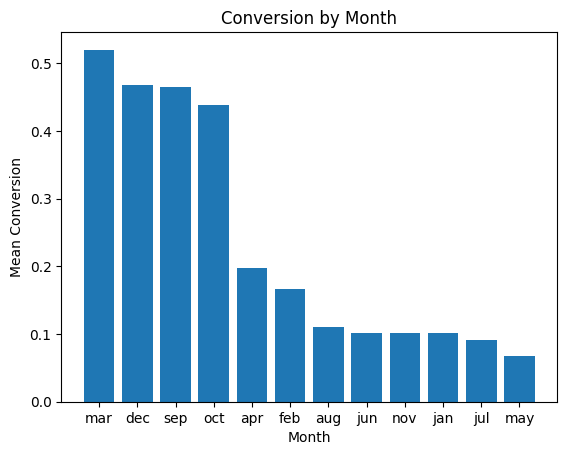

In [102]:
conversion_by_month = df.groupby('mon')['target'].mean()
conversion_by_month_sorted = conversion_by_month.sort_values(ascending=False)

plt.bar(conversion_by_month_sorted.index, conversion_by_month_sorted.values)
plt.title('Conversion by Month')
plt.xlabel('Month')
plt.ylabel('Mean Conversion')
plt.xticks(conversion_by_month_sorted.index)  # This will ensure x-axis labels are displayed correctly
plt.show()


Maximum conversion around the month of March, December, September and October can be seen. Since there is a significant difference, Month can be considered as an important factor.

### Duration

<Axes: xlabel='dur', ylabel='num_calls'>

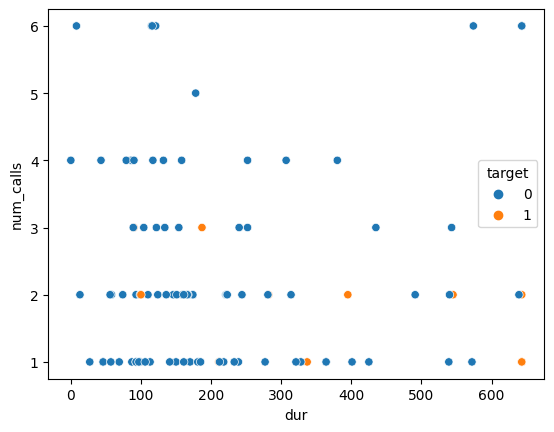

In [37]:
sns.scatterplot(x = 'dur', y = 'num_calls',hue = 'target', data = df.sample(100))

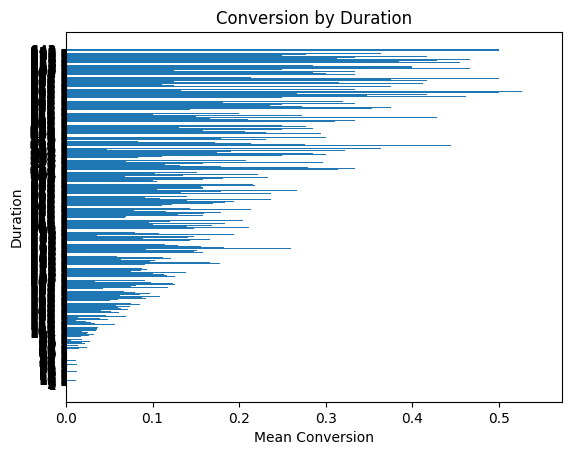

In [189]:
conversion_by_duration = df.groupby('dur')['target'].mean()
conversion_by_duration_sorted = conversion_by_duration.sort_values()

plt.barh(conversion_by_duration_sorted.index , conversion_by_duration_sorted.values)
plt.title('Conversion by Duration')
plt.xlabel('Mean Conversion')
plt.ylabel('Duration')
plt.yticks(conversion_by_duration_sorted.index)
plt.show()

Noticeable difference in conversion based on number of calls. Duration can be considered as an important feature for prediction.

### Number of calls

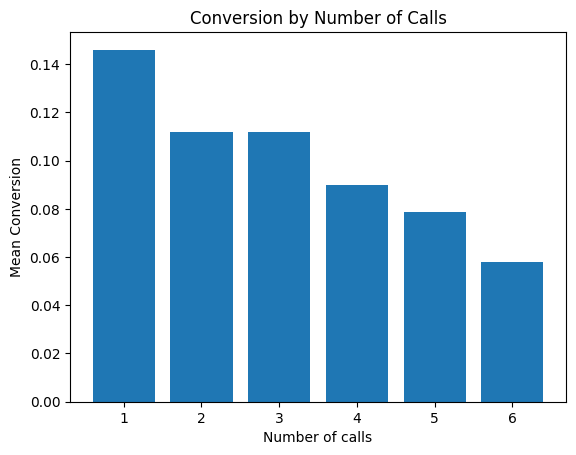

In [101]:
conversion_by_num_call = df.groupby('num_calls')['target'].mean()

plt.bar(conversion_by_num_call.index , conversion_by_num_call.values)
plt.title('Conversion by Number of Calls')
plt.xlabel('Number of calls')
plt.ylabel('Mean Conversion')
plt.xticks(conversion_by_num_call.index)
plt.show()

Maximum conversion when number of calls is less. So, this can be considered as an important feature.

### Previous Outcome

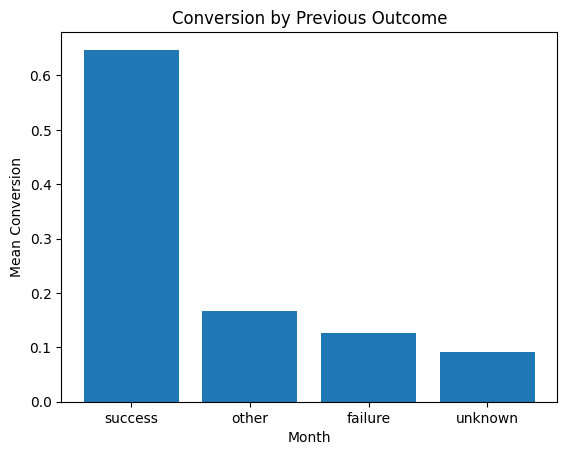

In [103]:
conversion_by_prev_outcome = df.groupby('prev_outcome')['target'].mean()
conversion_by_prev_outcome_sorted = conversion_by_prev_outcome.sort_values(ascending=False)

plt.bar(conversion_by_prev_outcome_sorted.index, conversion_by_prev_outcome_sorted.values)
plt.title('Conversion by Previous Outcome')
plt.xlabel('Month')
plt.ylabel('Mean Conversion')
plt.xticks(conversion_by_prev_outcome_sorted.index)  # This will ensure x-axis labels are displayed correctly
plt.show()


Maximum conversion when previous outcome is success. This can be an important feature.

## Encoding

In [42]:
columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [104]:
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
target             int64
dtype: object

All that is in string or object format needs to be converted to numerical format as Machine Learning algorithm can only work with numerical data. I have used Label Encoding to convert categorical data into numerical data based on Feature VS Target plot. This shall help in controlling dimensionality.

In [44]:
df.marital.value_counts()

marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64

In [105]:
df.marital = df.marital.map({'single' : 2, 'married' : 0, 'divorced' : 1})
df.marital.value_counts()

marital
0    27214
2    12790
1     5207
Name: count, dtype: int64

In [46]:
df.education_qual.value_counts()

education_qual
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

In [106]:
df.education_qual = df.education_qual.map({'primary' : 0, 'secondary' : 1, 'unknown' : 2, 'tertiary' : 3})
df.education_qual.value_counts()

education_qual
1    23202
3    13301
0     6851
2     1857
Name: count, dtype: int64

In [48]:
df.call_type.value_counts()

call_type
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64

In [107]:
df.call_type = df.call_type.map({'unknown' : 0, 'cellular' : 2, 'telephone' : 1})
df.call_type.value_counts()

call_type
2    29285
0    13020
1     2906
Name: count, dtype: int64

In [50]:
df.mon.value_counts()

mon
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: count, dtype: int64

In [108]:
df.mon = df.mon.map({'jan' : 3, 'feb' : 7, 'mar' : 12, 'apr' : 8, 'may' : 1, 'jun' : 5, 'jul' : 2, 'aug' : 6, 'sep' : 10, 'oct' : 9, 'nov' : 4, 'dec' : 11})
df.mon.value_counts()

mon
1     13766
2      6895
6      6247
5      5341
4      3970
8      2932
7      2649
3      1403
9       738
10      579
12      477
11      214
Name: count, dtype: int64

In [109]:
df.prev_outcome.value_counts()

prev_outcome
unknown    36959
failure     4901
other       1840
success     1511
Name: count, dtype: int64

In [110]:
df.prev_outcome = df.prev_outcome.map({'unknown' : 2, 'success' : 3, 'failure' : 1, 'other' : 0})
df.prev_outcome.value_counts()

prev_outcome
2    36959
1     4901
0     1840
3     1511
Name: count, dtype: int64

In [111]:
del df['y']

In [112]:
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,target
0,58,management,0,3,0,5,1,261,1,2,0
1,44,technician,2,1,0,5,1,151,1,2,0
2,33,entrepreneur,0,1,0,5,1,76,1,2,0
3,47,blue-collar,0,2,0,5,1,92,1,2,0
4,33,unknown,2,2,0,5,1,198,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,0,3,2,17,4,643,3,2,1
45207,71,retired,1,0,2,17,4,456,2,2,1
45208,72,retired,0,1,2,17,4,643,5,3,1
45209,57,blue-collar,0,1,1,17,4,508,4,2,0


In [113]:
df.job.nunique()

12

In [114]:
df.job.value_counts()

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

In [115]:
df.job = df.job.map({'student' : 12, 'retired' :11, 'unemployed' : 10, 'management' : 9, 'admin.' : 8, 'self-employed' : 7, 'unknown' : 6, 'technician' : 5, 'services' : 4, 'housemaid' : 3, 'entrepreneur' : 2, 'blue-collar' : 1 })
df.job.value_counts()

job
1     9732
9     9458
5     7597
8     5171
4     4154
11    2264
7     1579
2     1487
10    1303
3     1240
12     938
6      288
Name: count, dtype: int64

In [116]:
df.dtypes

age               int64
job               int64
marital           int64
education_qual    int64
call_type         int64
day               int64
mon               int64
dur               int64
num_calls         int64
prev_outcome      int64
target            int64
dtype: object

In [117]:
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,target
0,58,9,0,3,0,5,1,261,1,2,0
1,44,5,2,1,0,5,1,151,1,2,0
2,33,2,0,1,0,5,1,76,1,2,0
3,47,1,0,2,0,5,1,92,1,2,0
4,33,6,2,2,0,5,1,198,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,5,0,3,2,17,4,643,3,2,1
45207,71,11,1,0,2,17,4,456,2,2,1
45208,72,11,0,1,2,17,4,643,5,3,1
45209,57,1,0,1,1,17,4,508,4,2,0


In [190]:
df.drop_duplicates()
df.shape

(45211, 11)

The data has been cleaned of null values, duplicates and outliers and further encoded to convert categorical data into numerical data.

## Split

Data has been categorised into training and testing data so as to develop model on training dataset and evaluate on testing dataset.

In [118]:
X = df.drop(columns = 'target')
y = df.target

In [119]:
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: target, Length: 45211, dtype: int64

In [120]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 45)

In [121]:
y_test.value_counts()

target
0    7996
1    1047
Name: count, dtype: int64

## Scale

Training data has been scaled down to uniform scale.

In [122]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [123]:
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9
count,3.616800e+04,3.616800e+04,3.616800e+04,3.616800e+04,3.616800e+04,3.616800e+04,3.616800e+04,3.616800e+04,3.616800e+04,3.616800e+04
mean,1.673807e-16,-2.494994e-17,-3.241527e-17,9.056630e-17,1.838830e-16,-1.944916e-17,-5.854394e-17,-9.154858e-17,1.147304e-16,-5.815103e-17
std,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00
min,-2.155405e+00,-1.395650e+00,-7.691499e-01,-1.381872e+00,-1.517271e+00,-1.773457e+00,-1.051010e+00,-1.330013e+00,-8.695889e-01,-3.482895e+00
25%,-7.456811e-01,-8.055209e-01,-7.691499e-01,-4.440462e-01,-1.517271e+00,-9.328655e-01,-1.051010e+00,-7.458858e-01,-8.695889e-01,2.976409e-01
50%,-1.817918e-01,-2.153919e-01,-7.691499e-01,-4.440462e-01,7.120826e-01,2.780986e-02,5.199696e-02,-3.092082e-01,-2.450721e-01,2.976409e-01
75%,6.640423e-01,9.648662e-01,1.489863e+00,1.431605e+00,7.120826e-01,6.282320e-01,7.873347e-01,4.734087e-01,3.794447e-01,2.976409e-01
max,5.081176e+00,1.850060e+00,1.489863e+00,1.431605e+00,7.120826e-01,1.829076e+00,2.993348e+00,2.316528e+00,2.252995e+00,2.187909e+00


## Check whether data is balanced?

In [124]:
y_train.value_counts()

target
0    31926
1     4242
Name: count, dtype: int64

In [125]:
(y_train.value_counts() / y_train.shape[0]) * 100

target
0    88.2714
1    11.7286
Name: count, dtype: float64

In [126]:
y_train

39502    0
24747    0
32523    0
19884    0
19554    0
        ..
32469    0
16317    0
12895    0
6012     0
6558     0
Name: target, Length: 36168, dtype: int64

Class 0:  31926
Class 1:  4242
Proportion of Class 0: 88.27 %


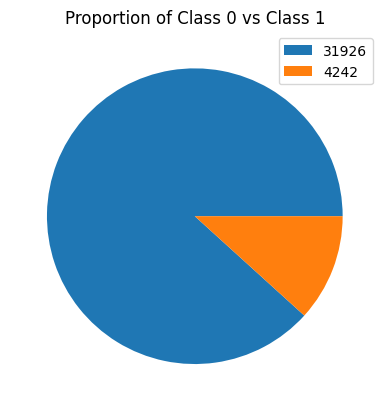

In [194]:
target_count = y_train.value_counts()
print('Class 0: ',target_count[0])
print('Class 1: ',target_count[1])
print('Proportion of Class 0:', round((target_count[0] / (target_count[0] + target_count[1])*100),2), '%')

plt.pie(target_count)
plt.title('Proportion of Class 0 vs Class 1')
plt.legend(target_count)

Data is imbalanced as majority of training target variable belongs to Class 0. This needs to be balanced for an unbiased model. We shall balanced the data using the 'SMOTE ENN' technique to avoid errors due to random over-sampling(Duplicates) and random under_sampling(Information lass)

In [132]:
from imblearn.combine import SMOTEENN

smt = SMOTEENN(sampling_strategy = 'all')
X_smt, y_smt = smt.fit_resample(X_train, y_train)

In [133]:
y_smt.shape

(56399,)

Class 0:  25885
Class 1:  30514
Proportion of Class 0: 45.9 %


<Axes: title={'center': 'Target Count'}, xlabel='target'>

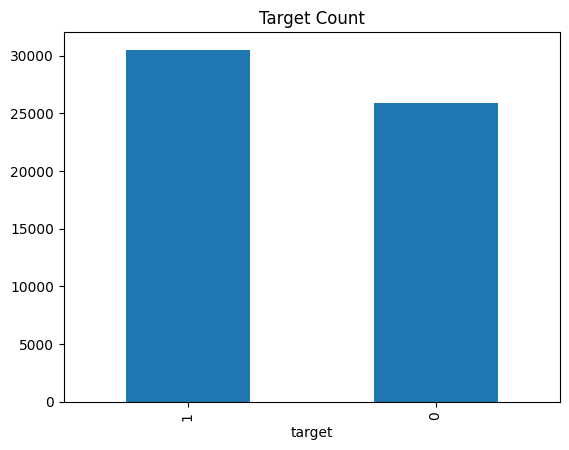

In [136]:
target_count = y_smt.value_counts()
print('Class 0: ',target_count[0])
print('Class 1: ',target_count[1])
print('Proportion of Class 0:', round((target_count[0] / (target_count[0] + target_count[1])*100),2), '%')

target_count.plot(kind = 'bar', title = 'Target Count')

Modelling to be done on Balanced data.

## Model

### Logistic Regression

In [137]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

lr = LogisticRegression()
lr.fit(X_smt, y_smt)

LogisticRegression()

In [138]:
y_pred = lr.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [139]:
lr.score(X_smt, y_smt)

0.8756183620276955

In [148]:
lr_score = lr.score(X_test, y_test)
lr_f1_score = f1_score(y_test, y_pred)
lr_training_score = lr.score(X_smt, y_smt)

In [149]:
print('Training Data Accuracy is: ', lr_training_score)
print('Test Data Accuracy is: ', lr_score, lr_f1_score)

Training Data Accuracy is:  0.8756183620276955
Test Data Accuracy is:  0.7572708172066792 0.4530276601046599


### KNN Algorithm

In [143]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score # import all the functions reqd for cross validation


for i in [1,2,3,4,5,6,7,10,11,13,16,19,20,25,40,50]:
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_smt, y_smt)
    print('K Value :', i, 'train score : ', knn.score(X_smt, y_smt), 'cv score : ', np.mean(cross_val_score(knn,X_smt, y_smt, cv = 10)))

K Value : 1 train score :  1.0 cv score :  0.9971276124105299
K Value : 2 train score :  0.9999468075675101 cv score :  0.9967375352000192
K Value : 3 train score :  0.9980496108087022 cv score :  0.9919324669003482
K Value : 4 train score :  0.9977304562137627 cv score :  0.9917374408721429
K Value : 5 train score :  0.9941842940477668 cv score :  0.9854607319340106
K Value : 6 train score :  0.9942729481019167 cv score :  0.9852834269694718
K Value : 7 train score :  0.9892019362045427 cv score :  0.9784038559978067
K Value : 10 train score :  0.9832621145764996 cv score :  0.9734924078636749
K Value : 11 train score :  0.9785989113282151 cv score :  0.969024247294991
K Value : 13 train score :  0.9746981329456196 cv score :  0.9653007927314713
K Value : 16 train score :  0.9704072767247647 cv score :  0.9615418866078311
K Value : 19 train score :  0.9647511480700013 cv score :  0.9559211903171807
K Value : 20 train score :  0.9645383783400415 cv score :  0.9561162289224361
K Value :

In [154]:
knn = KNeighborsClassifier(1)
knn.fit(X_smt, y_smt)
knn_score = knn.score(X_test, y_test)
knn_f1_score = f1_score(y_test, knn.predict(X_test))
knn_training_score = knn.score(X_smt, y_smt)
print('Training Data Accuracy is: ', knn_training_score)
print('Test Data Accuracy is: ', knn_score, knn_f1_score)

Training Data Accuracy is:  1.0
Test Data Accuracy is:  0.8277120424637842 0.4934980494148244


### Decision Tree Classifier

In [151]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_smt, y_smt)

DecisionTreeClassifier()

In [153]:
for depth in (18,19,20,21,23,25,27,29,30,33,35,37,39,40,50):
    dt = DecisionTreeClassifier(max_depth = depth)
    dt.fit(X_smt, y_smt)
    print('K Value :', depth, 'train score : ', dt.score(X_smt, y_smt), 'cv score : ', np.mean(cross_val_score(dt,X_smt, y_smt, cv = 10)))

K Value : 18 train score :  0.9961701448607245 cv score :  0.9598930196113944
K Value : 19 train score :  0.9975531481054629 cv score :  0.959804392283225
K Value : 20 train score :  0.9984219578361319 cv score :  0.9596625231574937
K Value : 21 train score :  0.999113459458501 cv score :  0.9602831376973182
K Value : 23 train score :  0.9995921913509105 cv score :  0.9602121685475646
K Value : 25 train score :  0.9999113459458501 cv score :  0.9604427027326157
K Value : 27 train score :  0.99998226918917 cv score :  0.9604427027326157
K Value : 29 train score :  1.0 cv score :  0.960389517531779
K Value : 30 train score :  1.0 cv score :  0.9599462236778061
K Value : 33 train score :  1.0 cv score :  0.9610810194705313
K Value : 35 train score :  1.0 cv score :  0.9600880959478003
K Value : 37 train score :  1.0 cv score :  0.9604959193760777
K Value : 39 train score :  1.0 cv score :  0.960637735049346
K Value : 40 train score :  1.0 cv score :  0.9605313803689857
K Value : 50 train 

In [155]:
dt = DecisionTreeClassifier(max_depth = 33)
dt.fit(X_smt, y_smt)
dt_score = dt.score(X_test, y_test)
dt_f1_score = f1_score(y_test, dt.predict(X_test))
dt_training_score = dt.score(X_smt, y_smt)
print('Training Data Accuracy is: ', dt_training_score)
print('Test Data Accuracy is: ', dt_score, dt_f1_score)

Training Data Accuracy is:  1.0
Test Data Accuracy is:  0.8457370341700763 0.5348449483161053


### Random Forest

In [158]:
from sklearn.ensemble import RandomForestClassifier
for i in [4,5,6,7,8,9,10,11,12,14,16,18,20,25,27]:
    rfc = RandomForestClassifier()
    rfc.fit(X_smt, y_smt)
    print('K Value :', i, 'train score : ', rfc.score(X_smt,y_smt), 'cv score : ', np.mean(cross_val_score(rfc,X_smt, y_smt, cv = 10)))

K Value : 4 train score :  1.0 cv score :  0.9797160259288467
K Value : 5 train score :  1.0 cv score :  0.9800529116499958
K Value : 6 train score :  1.0 cv score :  0.9793968707041515
K Value : 7 train score :  1.0 cv score :  0.979680577512989
K Value : 8 train score :  1.0 cv score :  0.9798224120518325
K Value : 9 train score :  1.0 cv score :  0.9798578667562152
K Value : 10 train score :  1.0 cv score :  0.9799642528792012
K Value : 11 train score :  1.0 cv score :  0.9798046626898035
K Value : 12 train score :  1.0 cv score :  0.979627367158052
K Value : 14 train score :  1.0 cv score :  0.9801238367800739
K Value : 16 train score :  1.0 cv score :  0.9796982859996051
K Value : 18 train score :  1.0 cv score :  0.9801061031393573
K Value : 20 train score :  1.0 cv score :  0.9796451070872936
K Value : 25 train score :  1.0 cv score :  0.9799642623119886
K Value : 27 train score :  1.0 cv score :  0.9800351811535417


In [159]:
rf = RandomForestClassifier(14)
rf.fit(X_smt,y_smt)
rf_score = rf.score(X_test, y_test)
rf_f1_score = f1_score(y_test, rf.predict(X_test))
rf_training_score = rf.score(X_smt, y_smt)
print('Training Data Accuracy is: ', rf_training_score)
print('Test Data Accuracy is: ', rf_score, rf_f1_score)

Training Data Accuracy is:  0.9994503448642706
Test Data Accuracy is:  0.8605551255114453 0.574130361364404


### XG Boost

In [160]:
import xgboost as xgb

for lr in [0.002, 0.005, 0.01, 0.04, 0.06, 0.07, 0.09, 0.1, 0.2, 0.3, 0.4, 0.5, 1]:
  xg = xgb.XGBClassifier(learning_rate=lr)
  xg.fit(X_smt, y_smt)
  train_score = xg.score(X_smt, y_smt)
  cross_val_result = np.mean(cross_val_score(xg, X_smt, y_smt, cv = 10))
  print(f'Learning Rate : {lr}, training score : {train_score} and cross-val score : {cross_val_result}')

Learning Rate : 0.002, training score : 0.9090232096313764 and cross-val score : 0.9047678873951546
Learning Rate : 0.005, training score : 0.9127998723381621 and cross-val score : 0.9090410848208841
Learning Rate : 0.01, training score : 0.9220376247805813 and cross-val score : 0.9198036691028413
Learning Rate : 0.04, training score : 0.9511870777850671 and cross-val score : 0.9467722258486051
Learning Rate : 0.06, training score : 0.9639709923934822 and cross-val score : 0.9602299304866438
Learning Rate : 0.07, training score : 0.9696093902374155 and cross-val score : 0.9631200391397801
Learning Rate : 0.09, training score : 0.9730491675384315 and cross-val score : 0.9671804014342869
Learning Rate : 0.1, training score : 0.9747513253781095 and cross-val score : 0.9684924927587633
Learning Rate : 0.2, training score : 0.9839358853880388 and cross-val score : 0.9723755941084067
Learning Rate : 0.3, training score : 0.9879607794464441 and cross-val score : 0.9716132267805644
Learning Ra

In [163]:
import xgboost as xgb
xg = xgb.XGBClassifier(learning_rate= 0.2)
xg.fit(X_smt, y_smt)
xg_score = xg.score(X_test, y_test)
xg_f1_score = f1_score(y_test, xg.predict(X_test))
xg_training_score = xg.score(X_smt, y_smt)
print('Training Data Accuracy is: ', xg_training_score)
print('Test Data Accuracy is: ', xg_score, xg_f1_score)

Training Data Accuracy is:  0.9839358853880388
Test Data Accuracy is:  0.8649784363596151 0.5814192663695577


In [199]:
Models = {'Model': ['Logistic Regression','KNN Algorithm', 'Decision Tree', 'Random Forest', 'XG Boost'],
          'Training Data Accuracy Score' : [lr_training_score,knn_training_score,dt_training_score,rf_training_score,xg_training_score],
          'Testing Data Accuracy Score' : [lr_score,knn_score,dt_score,rf_score,xg_score],
          'f1 Score' : [lr_f1_score,knn_f1_score,dt_f1_score,rf_f1_score,xg_f1_score]}


models_df = pd.DataFrame(Models)
models_df

,Model,Training Data Accuracy Score,Testing Data Accuracy Score,f1 Score
0,Logistic Regression,0.875618,0.757271,0.453028
1,KNN Algorithm,1.000000,0.827712,0.493498
2,Decision Tree,1.000000,0.845737,0.534845
3,Random Forest,0.999450,0.860555,0.574130
4,XG Boost,0.983936,0.864978,0.581419


We can see a table containing the 5 models used and it shows that XG Boost is giving the best result for this problem. So, we will be using XGBoost as our final model for Customer conversion prediction.

In [186]:
list(zip(X.columns, xg.feature_importances_))


[('age', 0.02354978),
 ('job', 0.04145135),
 ('marital', 0.02385212),
 ('education_qual', 0.031859618),
 ('call_type', 0.25890285),
 ('day', 0.030582814),
 ('mon', 0.11857723),
 ('dur', 0.23896256),
 ('num_calls', 0.07106661),
 ('prev_outcome', 0.16119504)]

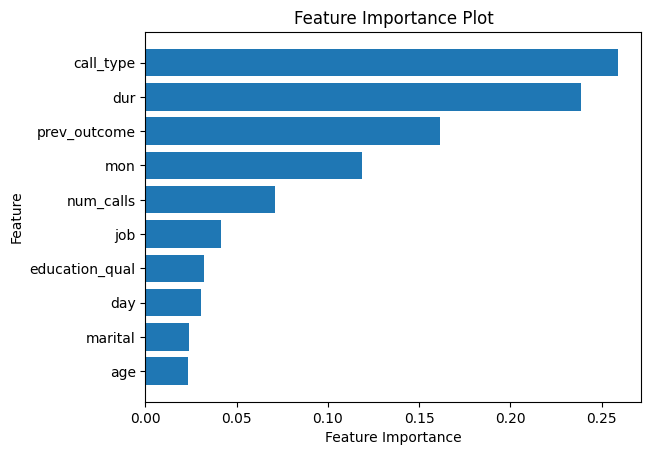

In [198]:
feature_importance_list = list(zip(X.columns, xg.feature_importances_))
feature_importance_list.sort(key=lambda x: x[1], reverse=False)

feature_names = [feature for feature, importance in feature_importance_list]
importance_values = [importance for feature, importance in feature_importance_list]

plt.barh(y=feature_names, width=importance_values)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot')
plt.show()


Based on the above Graph, we can see that call type and duration of call are the two most important features in predicting the customer conversion. Age and Marital status do not play an important role in customer conversion.